In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import plotly.express as px
import warnings

# Turn off the SettingWithCopyWarning
warnings.filterwarnings("ignore", category=pd.core.common.SettingWithCopyWarning)


In [2]:
data = pd.read_csv('data/qld_crash_locations.csv')
data

Crash_Ref_Number        Crash_Severity  Crash_Year Crash_Month  \
0                      1       Hospitalisation        2001     January   
1                      2  Property damage only        2001     January   
2                      3          Minor injury        2001     January   
3                      4  Property damage only        2001     January   
4                      5  Property damage only        2001     January   
...                  ...                   ...         ...         ...   
367225            367226     Medical treatment        2018        July   
367226            367227     Medical treatment        2018        July   
367227            367228       Hospitalisation        2018        July   
367228            367229     Medical treatment        2018        July   
367229            367230     Medical treatment        2018        July   

       Crash_Day_Of_Week  Crash_Hour    Crash_Nature      Crash_Type  \
0                 Monday           6         Head-on   Multi-Vehicle   
1              Wednesday           9           Angle   Multi-Vehicle   
2               Thursday           8        Rear-end   Multi-Vehicle   
3                 Sunday           8      Hit object  Single Vehicle   
4                Tuesday          16      Overturned  Single Vehicle   
...                  ...         ...             ...             ...   
367225            Friday           9        Rear-end   Multi-Vehicle   
367226          Saturday          16           Angle   Multi-Vehicle   
367227            Monday          19  Hit pedestrian  Hit pedestrian   
367228           Tuesday           8           Angle   Multi-Vehicle   
367229            Monday           2      Hit object  Single Vehicle   

        Crash_Longitude  Crash_Latitude  ... Count_Casualty_MedicallyTreated  \
0            153.052207      -27.586358  ...                               0   
1            153.064920      -27.595907  ...                               0   
2            153.058444      -27.599409  ...                               0   
3            153.081083      -27.598882  ...                               0   
4              0.000009       -0.000010  ...                               0   
...                 ...             ...  ...                             ...   
367225       153.007314      -27.438193  ...                               1   
367226       152.997975      -27.424132  ...                               1   
367227       153.006921      -27.440713  ...                               0   
367228       152.874980      -27.377406  ...                               1   
367229       152.907544      -27.393295  ...                               1   

       Count_Casualty_MinorInjury Count_Casualty_Total Count_Unit_Car  \
0                               0                    1              1   
1                               0                    0              2   
2                               1                    1              2   
3                               0                    0              1   
4                               0                    0              1   
...                           ...                  ...            ...   
367225                          0                    1              1   
367226                          0                    1              2   
367227                          0                    1              1   
367228                          0                    1              2   
367229                          0                    1              1   

       Count_Unit_Motorcycle_Moped Count_Unit_Truck Count_Unit_Bus  \
0                                0                0              0   
1                                0                0              0   
2                                0                0              0   
3                                0                0              0   
4                                0                0              0

In [3]:
# Filter the data to include only the desired years and accidents in Brisbane City
years  = [2019,2020,2021]
brisbane_crash_data = data[data['Crash_Year'].isin(years)]
brisbane_crash_data = brisbane_crash_data[brisbane_crash_data['Loc_Local_Government_Area']=='Brisbane City']
brisbane_crash_data.columns

Index(['Crash_Ref_Number', 'Crash_Severity', 'Crash_Year', 'Crash_Month',
       'Crash_Day_Of_Week', 'Crash_Hour', 'Crash_Nature', 'Crash_Type',
       'Crash_Longitude', 'Crash_Latitude', 'Crash_Street',
       'Crash_Street_Intersecting', 'State_Road_Name', 'Loc_Suburb',
       'Loc_Local_Government_Area', 'Loc_Post_Code', 'Loc_Police_Division',
       'Loc_Police_District', 'Loc_Police_Region',
       'Loc_Queensland_Transport_Region', 'Loc_Main_Roads_Region',
       'Loc_ABS_Statistical_Area_2', 'Loc_ABS_Statistical_Area_3',
       'Loc_ABS_Statistical_Area_4', 'Loc_ABS_Remoteness',
       'Loc_State_Electorate', 'Loc_Federal_Electorate',
       'Crash_Controlling_Authority', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Speed_Limit',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code', 'Crash_DCA_Description',
       'Crash_DCA_Group_De

# What are the key factors that influence crash severity in different areas of Queensland?

## DATA PREPARATION

To answer the above questions, it is important to select relevant columns from the dataset that can provide insights into crash severity and location-based factors. Here is a suggested refined dataset that includes columns necessary for analysis:

In [4]:
# Define the columns to keep in the refined dataset
columns_to_keep = [
    'Crash_Ref_Number',
    'Crash_Severity',
    'Crash_Year',
    'Crash_Month',
    'Crash_Day_Of_Week',
    'Crash_Hour',
    'Crash_Nature',
    'Crash_Type',
    'Crash_Longitude',
    'Crash_Latitude',
    'Crash_Street',
    'Crash_Street_Intersecting',
    'Crash_Roadway_Feature',
    'Crash_Traffic_Control',
    'Crash_Road_Surface_Condition',
    'Crash_Speed_Limit',
    'Crash_Atmospheric_Condition',
    'Crash_Lighting_Condition',
    'Crash_Road_Horiz_Align',
    'Crash_Road_Vert_Align', 
    'Crash_DCA_Code',
    'Crash_DCA_Description',
    'Count_Casualty_Fatality',
    'Count_Casualty_Hospitalised',
    'Count_Casualty_MedicallyTreated',
    'Count_Casualty_MinorInjury',
    'Count_Unit_Car',
    'Count_Unit_Motorcycle_Moped',
    'Count_Unit_Truck',
    'Count_Unit_Bus',
    'Count_Unit_Bicycle',
    'Count_Unit_Pedestrian',
    'Count_Unit_Other'
]

# Create the refined dataset with selected columns
crash_df = brisbane_crash_data[columns_to_keep].copy()
crash_df = crash_df.set_index('Crash_Ref_Number')
crash_df
# Optional: Save the refined dataset to a new CSV file
#refined_dataset.to_csv('refined_crash_data.csv', index=False)

Crash_Severity  Crash_Year Crash_Month Crash_Day_Of_Week  \
Crash_Ref_Number                                                                
319019            Medical treatment        2019     January         Wednesday   
319020            Medical treatment        2019     January            Friday   
319021            Medical treatment        2019     January            Monday   
319022              Hospitalisation        2019     January            Friday   
319023              Hospitalisation        2019     January          Saturday   
...                             ...         ...         ...               ...   
366652            Medical treatment        2019       April            Monday   
366653            Medical treatment        2019       April            Monday   
366654              Hospitalisation        2019       April           Tuesday   
366709                        Fatal        2021    November            Monday   
366720            Medical treatment        2021    November          Thursday   

                  Crash_Hour Crash_Nature      Crash_Type  Crash_Longitude  \
Crash_Ref_Number                                                             
319019                    12   Hit object  Single Vehicle       153.015951   
319020                    20     Rear-end   Multi-Vehicle       153.007858   
319021                    16     Rear-end   Multi-Vehicle       153.009463   
319022                    17        Angle   Multi-Vehicle       153.015020   
319023                    17    Sideswipe   Multi-Vehicle       153.029709   
...                      ...          ...             ...              ...   
366652                     7     Rear-end   Multi-Vehicle       153.057592   
366653                    20     Rear-end   Multi-Vehicle       153.056842   
366654                     5        Angle   Multi-Vehicle       153.056538   
366709                    18        Angle   Multi-Vehicle       153.007444   
366720                    20   Hit object  Single Vehicle       152.976469   

                  Crash_Latitude   Crash_Street  ...  \
Crash_Ref_Number                                 ...   
319019                -27.415786     Webster Rd  ...   
319020                -27.409174     Appleby Rd  ...   
319021                -27.400963     Appleby Rd  ...   
319022                -27.421443      Grange Rd  ...   
319023                -27.412130    Stafford Rd  ...   
...                          ...            ...  ...   
366652                -27.417009    Sandgate Rd  ...   
366653                -27.397505   Campbell Tce  ...   
366654                -27.420706   Liverpool Rd  ...   
366709                -27.656401  Forestdale Dr  ...   
366720                -27.644292     Johnson Rd  ...   

                 Count_Casualty_Hospitalised Count_Casualty_MedicallyTreated  \
Crash_Ref_Number                                                               
319019                                     0                               1   
319020                                     0                               2   
319021                                     0                               1   
319022                                     2                               1   
319023                                     2                               0   
...                                      ...                             ...   
366652                                     0                               1   
366653                                     0                               1   
366654                                     1                               1   
366709                                     0                               1   
366720                                     0                               1   

                 Count_Casualty_MinorInjury Count_Unit_Car  \
Crash_Ref_Number                                             
319019                                    0              0

Searching for missing values

In [5]:
crash_df.isna().sum()

Crash_Severity                        0
Crash_Year                            0
Crash_Month                           0
Crash_Day_Of_Week                     0
Crash_Hour                            0
Crash_Nature                          0
Crash_Type                            0
Crash_Longitude                       0
Crash_Latitude                        0
Crash_Street                          0
Crash_Street_Intersecting          4964
Crash_Roadway_Feature                 0
Crash_Traffic_Control                 0
Crash_Road_Surface_Condition          0
Crash_Speed_Limit                     0
Crash_Atmospheric_Condition           0
Crash_Lighting_Condition              0
Crash_Road_Horiz_Align                0
Crash_Road_Vert_Align                 0
Crash_DCA_Code                        0
Crash_DCA_Description                 0
Count_Casualty_Fatality               0
Count_Casualty_Hospitalised           0
Count_Casualty_MedicallyTreated       0
Count_Casualty_MinorInjury            0


approximately 49.4% missing from Crash_Street_Intersecting, the values in the column are  geographical location. Imputing geographical location data, such as intersecting streets, can be challenging without additional information and is out of scope for the study, so we can drop this column

In [6]:
crash_df.drop("Crash_Street_Intersecting", axis=1, inplace=True)

In [7]:
crash_df.columns

Index(['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Road_Surface_Condition',
       'Crash_Speed_Limit', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code', 'Crash_DCA_Description',
       'Count_Casualty_Fatality', 'Count_Casualty_Hospitalised',
       'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury',
       'Count_Unit_Car', 'Count_Unit_Motorcycle_Moped', 'Count_Unit_Truck',
       'Count_Unit_Bus', 'Count_Unit_Bicycle', 'Count_Unit_Pedestrian',
       'Count_Unit_Other'],
      dtype='object')

In [8]:
# Define the columns to keep
selected_columns = ['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Road_Surface_Condition',
       'Crash_Speed_Limit', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align']
# Select the relevant columns
df = crash_df[selected_columns]

# Verify the selected data
df.head()

Crash_Severity  Crash_Year Crash_Month Crash_Day_Of_Week  \
Crash_Ref_Number                                                                
319019            Medical treatment        2019     January         Wednesday   
319020            Medical treatment        2019     January            Friday   
319021            Medical treatment        2019     January            Monday   
319022              Hospitalisation        2019     January            Friday   
319023              Hospitalisation        2019     January          Saturday   

                  Crash_Hour Crash_Nature      Crash_Type  Crash_Longitude  \
Crash_Ref_Number                                                             
319019                    12   Hit object  Single Vehicle       153.015951   
319020                    20     Rear-end   Multi-Vehicle       153.007858   
319021                    16     Rear-end   Multi-Vehicle       153.009463   
319022                    17        Angle   Multi-Vehicle       153.015020   
319023                    17    Sideswipe   Multi-Vehicle       153.029709   

                  Crash_Latitude Crash_Street      Crash_Roadway_Feature  \
Crash_Ref_Number                                                           
319019                -27.415786   Webster Rd         No Roadway Feature   
319020                -27.409174   Appleby Rd  Intersection - T-Junction   
319021                -27.400963   Appleby Rd  Intersection - Roundabout   
319022                -27.421443    Grange Rd  Intersection - T-Junction   
319023                -27.412130  Stafford Rd         No Roadway Feature   

                 Crash_Traffic_Control Crash_Road_Surface_Condition  \
Crash_Ref_Number                                                      
319019              No traffic control               Unsealed - Dry   
319020              No traffic control                 Sealed - Dry   
319021                   Give way sign                 Sealed - Dry   
319022                       Stop sign                 Sealed - Dry   
319023              No traffic control                 Sealed - Dry   

                 Crash_Speed_Limit Crash_Atmospheric_Condition  \
Crash_Ref_Number                                                 
319019                     60 km/h                       Clear   
319020                     60 km/h                       Clear   
319021                     60 km/h                       Clear   
319022                     60 km/h                       Clear   
319023                     60 km/h                       Clear   

                 Crash_Lighting_Condition Crash_Road_Horiz_Align  \
Crash_Ref_Number                                                   
319019                           Daylight               Straight   
319020                 Darkness - Lighted               Straight   
319021                           Daylight               Straight   
319022                           Daylight               Straight   
319023                           Daylight               Straight   

                 Crash_Road_Vert_Align  
Crash_Ref_Number                        
319019                           Level  
319020                           Level  
319021                           Grade  
319022                             Dip  
319023                             Dip

In [9]:
df.columns

Index(['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Road_Surface_Condition',
       'Crash_Speed_Limit', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align'],
      dtype='object')

## ANALYZING THE DATA TO FIND PATTERNS BY DIFFERENT FACOTRS

### BY DATE, TIME, HOUR OF THE DAY, HOUR OF THE WEEK 

In [10]:
crash_by_datetime = df[['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street',]]
crash_by_datetime

Crash_Severity  Crash_Year Crash_Month Crash_Day_Of_Week  \
Crash_Ref_Number                                                                
319019            Medical treatment        2019     January         Wednesday   
319020            Medical treatment        2019     January            Friday   
319021            Medical treatment        2019     January            Monday   
319022              Hospitalisation        2019     January            Friday   
319023              Hospitalisation        2019     January          Saturday   
...                             ...         ...         ...               ...   
366652            Medical treatment        2019       April            Monday   
366653            Medical treatment        2019       April            Monday   
366654              Hospitalisation        2019       April           Tuesday   
366709                        Fatal        2021    November            Monday   
366720            Medical treatment        2021    November          Thursday   

                  Crash_Hour Crash_Nature      Crash_Type  Crash_Longitude  \
Crash_Ref_Number                                                             
319019                    12   Hit object  Single Vehicle       153.015951   
319020                    20     Rear-end   Multi-Vehicle       153.007858   
319021                    16     Rear-end   Multi-Vehicle       153.009463   
319022                    17        Angle   Multi-Vehicle       153.015020   
319023                    17    Sideswipe   Multi-Vehicle       153.029709   
...                      ...          ...             ...              ...   
366652                     7     Rear-end   Multi-Vehicle       153.057592   
366653                    20     Rear-end   Multi-Vehicle       153.056842   
366654                     5        Angle   Multi-Vehicle       153.056538   
366709                    18        Angle   Multi-Vehicle       153.007444   
366720                    20   Hit object  Single Vehicle       152.976469   

                  Crash_Latitude   Crash_Street  
Crash_Ref_Number                                 
319019                -27.415786     Webster Rd  
319020                -27.409174     Appleby Rd  
319021                -27.400963     Appleby Rd  
319022                -27.421443      Grange Rd  
319023                -27.412130    Stafford Rd  
...                          ...            ...  
366652                -27.417009    Sandgate Rd  
366653                -27.397505   Campbell Tce  
366654                -27.420706   Liverpool Rd  
366709                -27.656401  Forestdale Dr  
366720                -27.644292     Johnson Rd  

[10029 rows x 10 columns]

### MAPPING CATEGORICAL VALUES TO NUMERICAL DATA TYPES

In [11]:
crash_by_datetime.dtypes

Crash_Severity        object
Crash_Year             int64
Crash_Month           object
Crash_Day_Of_Week     object
Crash_Hour             int64
Crash_Nature          object
Crash_Type            object
Crash_Longitude      float64
Crash_Latitude       float64
Crash_Street          object
dtype: object

In [12]:
# Convert Crash_Month column to numerical representation
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
crash_by_datetime['Crash_Month'] = crash_by_datetime['Crash_Month'].apply(lambda x: month_mapping[x])

# Convert Crash_Day_Of_Week column to numerical representation
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}
crash_by_datetime['Crash_Day_Of_Week'] = crash_by_datetime['Crash_Day_Of_Week'].apply(lambda x: day_mapping[x])

In [13]:
crash_by_datetime['Crash_Severity'].value_counts()

Medical treatment    4739
Hospitalisation      3565
Minor injury         1665
Fatal                  60
Name: Crash_Severity, dtype: int64

In [14]:
# Import necessary libraries
monthly_crash_counts = crash_by_datetime.groupby(['Crash_Year', 'Crash_Month']).size().reset_index(name='Crash_Count')

# Calculate descriptive statistics
monthly_stats = monthly_crash_counts.groupby('Crash_Month')['Crash_Count'].describe()

# Print descriptive statistics
monthly_stats

count        mean        std    min    25%    50%    75%    max
Crash_Month                                                                 
1              3.0  254.000000   3.000000  251.0  252.5  254.0  255.5  257.0
2              3.0  273.666667   8.082904  269.0  269.0  269.0  276.0  283.0
3              3.0  313.000000  68.088178  247.0  278.0  309.0  346.0  383.0
4              3.0  259.333333  78.360279  169.0  234.5  300.0  304.5  309.0
5              3.0  281.000000  63.458648  208.0  260.0  312.0  317.5  323.0
6              3.0  292.333333  50.123182  236.0  272.5  309.0  320.5  332.0
7              3.0  291.666667  28.536526  264.0  277.0  290.0  305.5  321.0
8              3.0  288.666667  48.221710  238.0  266.0  294.0  314.0  334.0
9              3.0  269.666667  20.502032  246.0  263.5  281.0  281.5  282.0
10             3.0  279.666667  12.055428  267.0  274.0  281.0  286.0  291.0
11             3.0  286.333333  24.906492  270.0  272.0  274.0  294.5  315.0
12             3.0  253.666667  18.147543  237.0  244.0  251.0  262.0  273.0

Based on the descriptive analysis of car crashes in Brisbane city from 2019 to 2021, the following insights can be derived:

    Overall Trend: The average crash count per month in Brisbane city during the specified period ranges from approximately 253 to 313. This indicates a moderate to high number of car crashes on average.

    Seasonal Patterns: There may be variations in crash counts across different months in Brisbane city. For example, March consistently shows the highest average crash count, while January and December tend to have relatively lower crash counts.

    Month with the Lowest Crash Count: The month with the lowest crash count is typically observed in either January or December, with an average ranging around 253 to 254 crashes. This suggests a potentially lower incidence of car crashes during those months.

    Month with the Highest Crash Count: March consistently shows the highest average crash count, with an average ranging from 313 to 346 crashes. This indicates a potential peak in car accidents during that particular month.

    Variability: The standard deviation values provide insights into the variability or dispersion of crash counts across different months. Higher standard deviations imply greater fluctuations in crash counts, while lower standard deviations suggest more stable patterns.

    Quartiles: The 25th and 75th percentiles indicate the spread of crash counts within each month. For example, the 25th percentile represents the crash count below which 25% of the counts fall, while the 75th percentile represents the count below which 75% of the counts fall.

This descriptive analysis provides an understanding of the general trends and patterns in car crashes in Brisbane city from 2019 to 2021. It allows for the identification of months with potentially higher crash rates and months with lower crash counts. These insights can assist in identifying seasonal trends and further investigating factors that contribute to vechicle crashes in the city, enabling targeted interventions and safety measures to reduce the incidence of car crashes and improve road safety.

In [15]:
# Group by Crash_Day_Of_Week and calculate the count of crashes
weekly_crash_counts = crash_by_datetime.groupby('Crash_Day_Of_Week').size().reset_index(name='Crash_Count')

# Calculate descriptive statistics
weekly_stats = weekly_crash_counts.describe()

# Print descriptive statistics
weekly_stats

Crash_Day_Of_Week  Crash_Count
count           7.000000     7.000000
mean            4.000000  1432.714286
std             2.160247   285.448019
min             1.000000   922.000000
25%             2.500000  1284.500000
50%             4.000000  1570.000000
75%             5.500000  1633.500000
max             7.000000  1701.000000

In [16]:
# Group by Crash_Hour and calculate the count of crashes
hourly_crash_counts = df.groupby('Crash_Hour').size().reset_index(name='Crash_Count')

# Calculate descriptive statistics
hourly_stats = hourly_crash_counts.describe()

# Print descriptive statistics
hourly_crash_counts

Crash_Hour  Crash_Count
0            0          120
1            1           86
2            2           74
3            3           56
4            4           87
5            5          236
6            6          376
7            7          570
8            8          718
9            9          543
10          10          478
11          11          532
12          12          526
13          13          506
14          14          665
15          15          927
16          16          871
17          17          777
18          18          595
19          19          370
20          20          308
21          21          258
22          22          191
23          23          159

### BY SEVERITY AND LOCATION 

In [17]:
# Group data by area to get location based results
crash_by_area = brisbane_crash_data[['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street','Loc_Suburb','Loc_ABS_Statistical_Area_3']]
crash_by_area.Crash_Severity.value_counts()

Medical treatment    4739
Hospitalisation      3565
Minor injury         1665
Fatal                  60
Name: Crash_Severity, dtype: int64

In [18]:
# Mapping dictionary for severity conversion
severity_mapping = {
    'Fatal': 4,
    'Hospitalisation': 3,
    'Medical treatment': 2,
    'Minor injury': 1,
}

# Mapping to dataframe and saving to a new col
crash_by_area['Crash_Severity_n'] = crash_by_area['Crash_Severity'].map(severity_mapping)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Crash_Severity_Numerical' column
crash_by_area['Crash_Severity_n'] = scaler.fit_transform(crash_by_area[['Crash_Severity_n']])

# Verify the scaled values
#print(df[['Crash_Severity', 'Crash_Severity_Numerical', 'Scaled_Severity']].head())

#crash_by_street['Crash_Severity_n'] = minmax_scale(crash_by_street['Crash_Severity_n'])
crash_by_area

Crash_Severity  Crash_Year Crash_Month Crash_Day_Of_Week  \
319018  Medical treatment        2019     January         Wednesday   
319019  Medical treatment        2019     January            Friday   
319020  Medical treatment        2019     January            Monday   
319021    Hospitalisation        2019     January            Friday   
319022    Hospitalisation        2019     January          Saturday   
...                   ...         ...         ...               ...   
366651  Medical treatment        2019       April            Monday   
366652  Medical treatment        2019       April            Monday   
366653    Hospitalisation        2019       April           Tuesday   
366708              Fatal        2021    November            Monday   
366719  Medical treatment        2021    November          Thursday   

        Crash_Hour Crash_Nature      Crash_Type  Crash_Longitude  \
319018          12   Hit object  Single Vehicle       153.015951   
319019          20     Rear-end   Multi-Vehicle       153.007858   
319020          16     Rear-end   Multi-Vehicle       153.009463   
319021          17        Angle   Multi-Vehicle       153.015020   
319022          17    Sideswipe   Multi-Vehicle       153.029709   
...            ...          ...             ...              ...   
366651           7     Rear-end   Multi-Vehicle       153.057592   
366652          20     Rear-end   Multi-Vehicle       153.056842   
366653           5        Angle   Multi-Vehicle       153.056538   
366708          18        Angle   Multi-Vehicle       153.007444   
366719          20   Hit object  Single Vehicle       152.976469   

        Crash_Latitude   Crash_Street        Loc_Suburb  \
319018      -27.415786     Webster Rd          Stafford   
319019      -27.409174     Appleby Rd          Stafford   
319020      -27.400963     Appleby Rd  Stafford Heights   
319021      -27.421443      Grange Rd            Grange   
319022      -27.412130    Stafford Rd            Kedron   
...                ...            ...               ...   
366651      -27.417009    Sandgate Rd         Clayfield   
366652      -27.397505   Campbell Tce    Wavell Heights   
366653      -27.420706   Liverpool Rd         Clayfield   
366708      -27.656401  Forestdale Dr         Larapinta   
366719      -27.644292     Johnson Rd         Heathwood   

       Loc_ABS_Statistical_Area_3  Crash_Severity_n  
319018                  Chermside          0.333333  
319019                  Chermside          0.333333  
319020                  Chermside          0.333333  
319021     Brisbane Inner - North          0.666667  
319022                  Chermside          0.666667  
...                           ...               ...  
366651     Brisbane Inner - North          0.333333  
366652                     Nundah          0.333333  
366653     Brisbane Inner - North          0.666667  
366708     Rocklea - Acacia Ridge          1.000000  
366719              Browns Plains          0.333333  

[10029 rows x 13 columns]

In [19]:
crash_by_area[['Crash_Severity', 'Crash_Severity_n']].value_counts()

Crash_Severity     Crash_Severity_n
Medical treatment  0.333333            4739
Hospitalisation    0.666667            3565
Minor injury       0.000000            1665
Fatal              1.000000              60
dtype: int64

In [20]:
crash_by_area.columns

Index(['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street', 'Loc_Suburb',
       'Loc_ABS_Statistical_Area_3', 'Crash_Severity_n'],
      dtype='object')

In [21]:
# Group the data by Crash Severity and Street Name
grouped_data = crash_by_area.groupby(['Crash_Severity','Loc_ABS_Statistical_Area_3']).agg({'Crash_Latitude': 'mean',
                                                                                    'Crash_Longitude': 'mean',
                                                                                    'Crash_Year': 'count'}).reset_index()

# Rename the count column
grouped_data.rename(columns={'Crash_Year': 'Crash_Counts'}, inplace=True)

grouped_data

# Use px.scatter_mapbox to create the plot
fig = px.scatter_mapbox(grouped_data, lat='Crash_Latitude', lon='Crash_Longitude', hover_name='Loc_ABS_Statistical_Area_3',
                        color='Crash_Severity',
                        color_discrete_sequence=['black', 'red', 'orange','yellow'],
                        hover_data=['Crash_Counts'],
                        size_max=30, zoom=9)

# Customize the map layout
fig.update_layout(mapbox_style='open-street-map')
fig.update_traces(marker_size = 15)
fig.update_layout(title='Number of Road Crashes by Statistical Area', height=600, width=800)

# Display the map
fig.show()

In [22]:
# Assuming your data is stored in a pandas DataFrame called 'df'
grouped_data = crash_by_area.groupby('Loc_ABS_Statistical_Area_3').agg({'Crash_Severity_n': 'mean',
                                                             'Crash_Latitude': 'mean',
                                                             'Crash_Longitude': 'mean',
                                                             'Crash_Year': 'count'}).reset_index()

# Rename the count column
grouped_data.rename(columns={'Crash_Year': 'Crash_Counts','Loc_ABS_Statistical_Area_3':'Statistical_Area'}, inplace=True)
grouped_data

Statistical_Area  Crash_Severity_n  Crash_Latitude  \
0        Bald Hills - Everton Park          0.421751      -27.350625   
1                   Brisbane Inner          0.378512      -27.469342   
2            Brisbane Inner - East          0.400440      -27.473845   
3           Brisbane Inner - North          0.400669      -27.434630   
4            Brisbane Inner - West          0.423387      -27.465511   
5                    Browns Plains          0.606061      -27.639549   
6                         Capalaba          0.416667      -27.507678   
7                        Carindale          0.394558      -27.494605   
8                        Centenary          0.375622      -27.546882   
9                        Chermside          0.390507      -27.388664   
10             Forest Lake - Oxley          0.420091      -27.589706   
11          Holland Park - Yeronga          0.413952      -27.503698   
12              Ipswich Hinterland          0.444444      -27.356649   
13                   Ipswich Inner          0.435897      -27.540025   
14  Kenmore - Brookfield - Moggill          0.423892      -27.520401   
15                      Mt Gravatt          0.388391      -27.560154   
16                          Nathan          0.387863      -27.549274   
17                          Nundah          0.378546      -27.386459   
18                       Redcliffe          0.444444      -27.145570   
19          Rocklea - Acacia Ridge          0.397348      -27.607349   
20                        Sandgate          0.421627      -27.326524   
21        Sherwood - Indooroopilly          0.392491      -27.506987   
22                       Sunnybank          0.369681      -27.595919   
23              The Gap - Enoggera          0.442379      -27.426193   
24              The Hills District          0.500000      -27.349325   
25                  Wynnum - Manly          0.412148      -27.459631   

    Crash_Longitude  Crash_Counts  
0        153.004009           377  
1        153.026445          1210  
2        153.059584           303  
3        153.036974           797  
4        152.995538           496  
5        152.966813            11  
6        153.154678           140  
7        153.100171           294  
8        152.940062           134  
9        153.028098           618  
10       152.960436           657  
11       153.041940           798  
12       152.768145             3  
13       152.796293            13  
14       152.927136           173  
15       153.095168           781  
16       153.039161           379  
17       153.073590           376  
18       153.397687             3  
19       153.030299           729  
20       153.047223           336  
21       152.979278           293  
22       153.063174           376  
23       152.959814           269  
24       152.771997             2  
25       153.144465           461

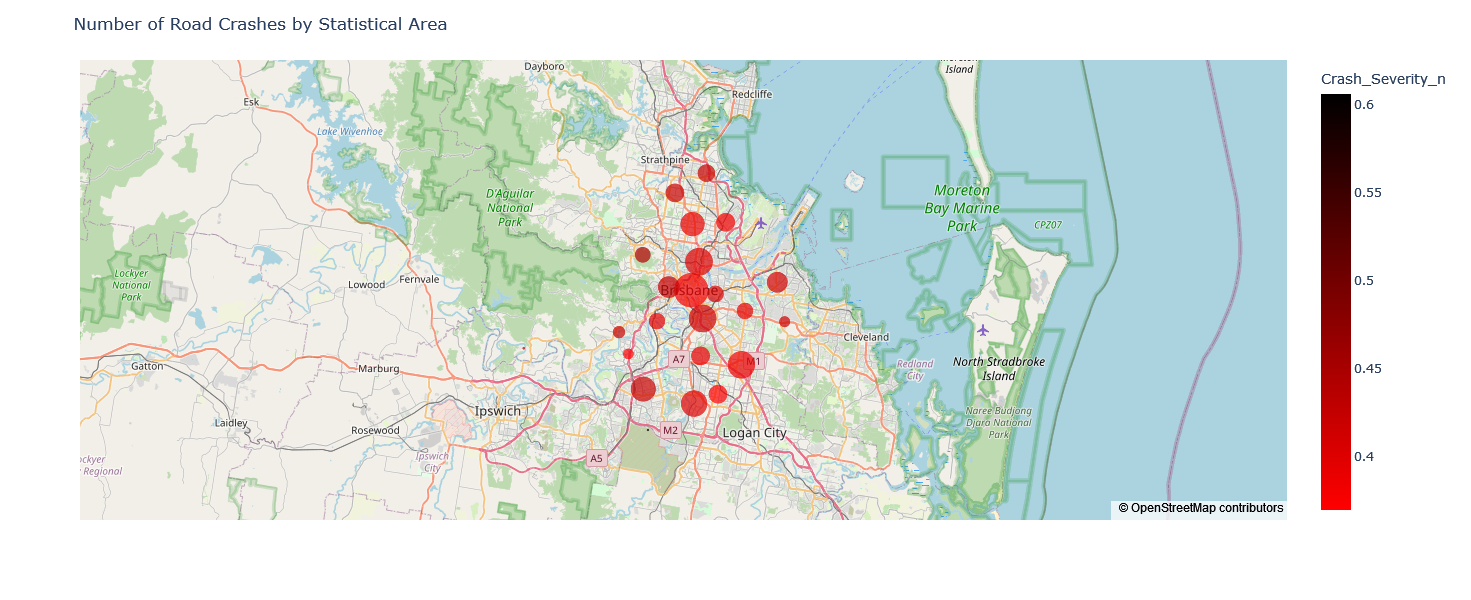

In [23]:
# Plot the points on a map using plotly.express
fig = px.scatter_mapbox(grouped_data, lat='Crash_Latitude', lon='Crash_Longitude', hover_name='Statistical_Area',
                        size='Crash_Counts', color='Crash_Severity_n',
                        color_continuous_scale=['red','black'], size_max=25, zoom=9,
                       template="plotly")

# Customize the map layout
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(title='Number of Road Crashes by Statistical Area', height=600, width=800)

# Display the map
fig.show()

### BRISBANE INNER CITY HAS THE HIGHEST NUMBER OF CRASHES
> 1. What could be the reason for this?
> 2. What are the hotspots inside the city? What could be the reason for it?
> 3. Are there any patterns that causes high severity in the crashes?

#### Taking a deeper look into the the Inner City 

>DATA

In [24]:
crashes_inner_city = brisbane_crash_data[brisbane_crash_data['Loc_ABS_Statistical_Area_3']=='Brisbane Inner']
crashes_inner_city = crashes_inner_city[['Crash_Ref_Number', 'Crash_Severity', 'Crash_Year', 'Crash_Month',
       'Crash_Day_Of_Week', 'Crash_Hour', 'Crash_Nature', 'Crash_Type',
       'Crash_Longitude', 'Crash_Latitude', 'Crash_Street',
       'Crash_Street_Intersecting', 'Loc_Suburb',
       'Crash_Controlling_Authority', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Speed_Limit',
       'Crash_Road_Surface_Condition', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align','Count_Casualty_Fatality', 'Count_Casualty_Hospitalised',
       'Count_Casualty_MedicallyTreated', 'Count_Casualty_MinorInjury',
       'Count_Casualty_Total', 'Count_Unit_Car', 'Count_Unit_Motorcycle_Moped',
       'Count_Unit_Truck', 'Count_Unit_Bus', 'Count_Unit_Bicycle',
       'Count_Unit_Pedestrian', 'Count_Unit_Other']]
crashes_inner_city

Crash_Ref_Number     Crash_Severity  Crash_Year Crash_Month  \
323774            323775  Medical treatment        2019    November   
323779            323780  Medical treatment        2019    November   
323780            323781  Medical treatment        2019    November   
323782            323783    Hospitalisation        2019    November   
323783            323784  Medical treatment        2019    November   
...                  ...                ...         ...         ...   
366019            366020  Medical treatment        2019    December   
366020            366021       Minor injury        2019    December   
366021            366022  Medical treatment        2019    December   
366024            366025  Medical treatment        2019    December   
366025            366026  Medical treatment        2019    December   

       Crash_Day_Of_Week  Crash_Hour       Crash_Nature      Crash_Type  \
323774            Friday          15          Sideswipe   Multi-Vehicle   
323779            Friday          18     Hit pedestrian  Hit pedestrian   
323780            Friday          19              Angle   Multi-Vehicle   
323782            Sunday          22  Fall from vehicle  Single Vehicle   
323783         Wednesday          17          Sideswipe   Multi-Vehicle   
...                  ...         ...                ...             ...   
366019            Friday          15           Rear-end   Multi-Vehicle   
366020            Friday          18           Rear-end   Multi-Vehicle   
366021          Saturday           7         Hit object  Single Vehicle   
366024          Thursday          18              Angle   Multi-Vehicle   
366025            Sunday          21  Fall from vehicle  Single Vehicle   

        Crash_Longitude  Crash_Latitude  ... Count_Casualty_MedicallyTreated  \
323774       153.037840      -27.453410  ...                               1   
323779       153.040441      -27.460002  ...                               1   
323780       153.041407      -27.449801  ...                               1   
323782       153.032508      -27.462018  ...                               0   
323783       153.032463      -27.461031  ...                               1   
...                 ...             ...  ...                             ...   
366019       153.035851      -27.482834  ...                               1   
366020       153.023252      -27.481094  ...                               0   
366021       153.035799      -27.473375  ...                               2   
366024       153.019097      -27.480732  ...                               1   
366025       153.019447      -27.473342  ...                               1   

       Count_Casualty_MinorInjury Count_Casualty_Total Count_Unit_Car  \
323774                          0                    1              2   
323779                          0                    1              1   
323780                          0                    1              1   
323782                          0                    1              0   
323783                          0                    1              1   
...                           ...                  ...            ...   
366019                          0                    1              3   
366020                          1                    1              2   
366021                          1                    3              3   
366024                          0                    1              1   
366025                          0                    1              0   

       Count_Unit_Motorcycle_Moped Count_Unit_Truck Count_Unit_Bus  \
323774                           0                0              0   
323779                           0                0              0   
323780                           1                0              0   
323782                           1                0              0   
323783                           0                0              1

### TAKING A LOOK AT THE STREET LEVEL

In [25]:
# Mapping dictionary for severity conversion
severity_mapping = {
    'Fatal': 4,
    'Hospitalisation': 3,
    'Medical treatment': 2,
    'Minor injury': 1,
}

# Mapping to dataframe and saving to a new col
crashes_inner_city['Crash_Severity_n'] = crashes_inner_city['Crash_Severity'].map(severity_mapping)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the 'Crash_Severity_Numerical' column
crashes_inner_city['Crash_Severity_n'] = scaler.fit_transform(crashes_inner_city[['Crash_Severity_n']])

# Verify the scaled values
#print(df[['Crash_Severity', 'Crash_Severity_Numerical', 'Scaled_Severity']].head())

#crash_by_street['Crash_Severity_n'] = minmax_scale(crash_by_street['Crash_Severity_n'])
crashes_inner_city

Crash_Ref_Number     Crash_Severity  Crash_Year Crash_Month  \
323774            323775  Medical treatment        2019    November   
323779            323780  Medical treatment        2019    November   
323780            323781  Medical treatment        2019    November   
323782            323783    Hospitalisation        2019    November   
323783            323784  Medical treatment        2019    November   
...                  ...                ...         ...         ...   
366019            366020  Medical treatment        2019    December   
366020            366021       Minor injury        2019    December   
366021            366022  Medical treatment        2019    December   
366024            366025  Medical treatment        2019    December   
366025            366026  Medical treatment        2019    December   

       Crash_Day_Of_Week  Crash_Hour       Crash_Nature      Crash_Type  \
323774            Friday          15          Sideswipe   Multi-Vehicle   
323779            Friday          18     Hit pedestrian  Hit pedestrian   
323780            Friday          19              Angle   Multi-Vehicle   
323782            Sunday          22  Fall from vehicle  Single Vehicle   
323783         Wednesday          17          Sideswipe   Multi-Vehicle   
...                  ...         ...                ...             ...   
366019            Friday          15           Rear-end   Multi-Vehicle   
366020            Friday          18           Rear-end   Multi-Vehicle   
366021          Saturday           7         Hit object  Single Vehicle   
366024          Thursday          18              Angle   Multi-Vehicle   
366025            Sunday          21  Fall from vehicle  Single Vehicle   

        Crash_Longitude  Crash_Latitude  ... Count_Casualty_MinorInjury  \
323774       153.037840      -27.453410  ...                          0   
323779       153.040441      -27.460002  ...                          0   
323780       153.041407      -27.449801  ...                          0   
323782       153.032508      -27.462018  ...                          0   
323783       153.032463      -27.461031  ...                          0   
...                 ...             ...  ...                        ...   
366019       153.035851      -27.482834  ...                          0   
366020       153.023252      -27.481094  ...                          1   
366021       153.035799      -27.473375  ...                          1   
366024       153.019097      -27.480732  ...                          0   
366025       153.019447      -27.473342  ...                          0   

       Count_Casualty_Total Count_Unit_Car Count_Unit_Motorcycle_Moped  \
323774                    1              2                           0   
323779                    1              1                           0   
323780                    1              1                           1   
323782                    1              0                           1   
323783                    1              1                           0   
...                     ...            ...                         ...   
366019                    1              3                           0   
366020                    1              2                           0   
366021                    3              3                           0   
366024                    1              1                           1   
366025                    1              0                           0   

       Count_Unit_Truck Count_Unit_Bus Count_Unit_Bicycle  \
323774                0              0                  0   
323779                0              0                  0   
323780                0              0                  0   
323782                0              0                  0   
323783                0              1                  0   
...                 ...            ...                ...   
366019                0              

In [26]:
# Assuming your data is stored in a pandas DataFrame called 'df'
grouped_data = crashes_inner_city.groupby('Crash_Street').agg({'Crash_Severity_n': 'mean',
                                                             'Crash_Latitude': 'mean',
                                                             'Crash_Longitude': 'mean',
                                                             'Crash_Year': 'count'}).reset_index()

# Rename the count column
grouped_data.rename(columns={'Crash_Year': 'Crash_Counts'}, inplace=True)

grouped_data

Crash_Street  Crash_Severity_n  Crash_Latitude  Crash_Longitude  \
0      Adelaide St          0.398148      -27.465827       153.028257   
1       Adeline La          0.000000      -27.466759       153.046530   
2         Agnes St          0.666667      -27.457500       153.031129   
3        Albert St          0.370370      -27.470371       153.025958   
4         Alden St          0.444444      -27.456204       153.034901   
..             ...               ...             ...              ...   
209  Wellington Rd          0.333333      -27.482315       153.040692   
210       Wharf St          0.166667      -27.464235       153.028877   
211      Whynot St          0.666667      -27.484698       153.008798   
212     Wickham St          0.348485      -27.454238       153.036995   
213    Wickham Tce          0.200000      -27.464159       153.024535   

     Crash_Counts  
0              36  
1               1  
2               1  
3               9  
4               3  
..            ...  
209             2  
210             2  
211             1  
212            22  
213             5  

[214 rows x 5 columns]

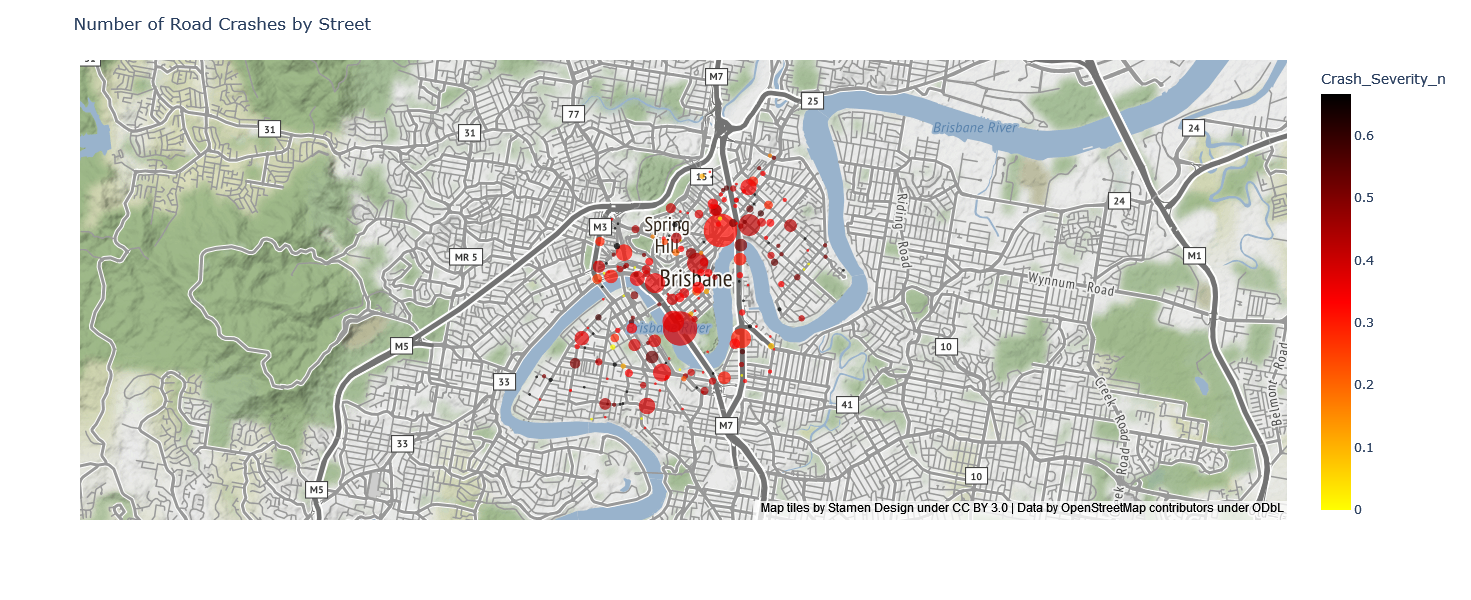

In [27]:
# Plot the points on a map using plotly.express
fig = px.scatter_mapbox(grouped_data, lat='Crash_Latitude', lon='Crash_Longitude', hover_name='Crash_Street',
                        size='Crash_Counts', color='Crash_Severity_n',
                        color_continuous_scale=['yellow','red','black'], size_max=25, zoom=12,
                       template="plotly")

# Customize the map layout
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(title='Number of Road Crashes by Street', height=600, width=800)


# Display the map
fig.show()

MAJORITY OF THE ACCIDENTS happend in the city occured near to the Central Business District and their average SEVERITY is between MEDICAL TREATEMENT AND HOSPITALISATION, with a few occurences of MINOR INJURY.
DATA INSIGHTS ARE INCONCLUSIVE

LETS SEE IF THERE ARE ANY COMMON FACTORS THAT INFULENCE IN ACCIDENT SEVERITY, WE CAN USE CLUSTERING TO IDENTIFY DIFFERENT TYPES OF SEVERITY CASES AND THE COMMON FACTORS THAT INFLUENCES IT 

dosent make sense to cluster based on location since is scattered throught, rather we can look into the different types of severity cases and the factors

In [28]:
# DATASET FOR CLUSTERING

# Define the features to keep
selected_features = ['Crash_Severity', 'Crash_Year', 'Crash_Month', 'Crash_Day_Of_Week',
       'Crash_Hour', 'Crash_Nature', 'Crash_Type', 'Crash_Longitude',
       'Crash_Latitude', 'Crash_Street','Loc_ABS_Statistical_Area_3', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Road_Surface_Condition',
       'Crash_Speed_Limit', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code', 'Crash_DCA_Group_Description']
crash_by_severity = brisbane_crash_data[selected_features]
crash_by_severity =  crash_by_severity[crash_by_severity['Loc_ABS_Statistical_Area_3']=='Brisbane Inner']
crash_by_severity.drop('Loc_ABS_Statistical_Area_3',axis=1,inplace=True)
crash_by_severity.head(5)

Crash_Severity  Crash_Year Crash_Month Crash_Day_Of_Week  \
323774  Medical treatment        2019    November            Friday   
323779  Medical treatment        2019    November            Friday   
323780  Medical treatment        2019    November            Friday   
323782    Hospitalisation        2019    November            Sunday   
323783  Medical treatment        2019    November         Wednesday   

        Crash_Hour       Crash_Nature      Crash_Type  Crash_Longitude  \
323774          15          Sideswipe   Multi-Vehicle       153.037840   
323779          18     Hit pedestrian  Hit pedestrian       153.040441   
323780          19              Angle   Multi-Vehicle       153.041407   
323782          22  Fall from vehicle  Single Vehicle       153.032508   
323783          17          Sideswipe   Multi-Vehicle       153.032463   

        Crash_Latitude   Crash_Street      Crash_Roadway_Feature  \
323774      -27.453410     Brookes St       Intersection - Cross   
323779      -27.460002    Harcourt St         No Roadway Feature   
323780      -27.449801  Montpelier Rd  Intersection - T-Junction   
323782      -27.462018    Adelaide St  Intersection - T-Junction   
323783      -27.461031         Ann St  Intersection - T-Junction   

           Crash_Traffic_Control Crash_Road_Surface_Condition  \
323774  Operating traffic lights                 Sealed - Dry   
323779        No traffic control                 Sealed - Dry   
323780        No traffic control                 Sealed - Dry   
323782  Operating traffic lights                 Sealed - Dry   
323783        No traffic control                 Sealed - Dry   

       Crash_Speed_Limit Crash_Atmospheric_Condition Crash_Lighting_Condition  \
323774           60 km/h                       Clear                 Daylight   
323779       0 - 50 km/h                       Clear       Darkness - Lighted   
323780           60 km/h                       Clear       Darkness - Lighted   
323782           60 km/h                       Clear       Darkness - Lighted   
323783           60 km/h                       Clear                Dawn/Dusk   

       Crash_Road_Horiz_Align Crash_Road_Vert_Align  Crash_DCA_Code  \
323774               Straight                 Level           306.0   
323779               Straight                 Level             3.0   
323780               Straight                 Level           107.0   
323782               Straight                 Level           707.0   
323783               Straight                 Level           306.0   

                  Crash_DCA_Group_Description  
323774                           Lane changes  
323779                             Pedestrian  
323780  Intersection from adjacent approaches  
323782            Off carriageway on straight  
323783                           Lane changes

PRE PROCESS THE DATA

In [29]:
# select features for clustering
selected_features = ['Crash_Severity', 'Crash_Roadway_Feature',
       'Crash_Traffic_Control', 'Crash_Road_Surface_Condition',
       'Crash_Speed_Limit', 'Crash_Atmospheric_Condition',
       'Crash_Lighting_Condition', 'Crash_Road_Horiz_Align',
       'Crash_Road_Vert_Align', 'Crash_DCA_Code']
subset_data = crash_by_severity[selected_features]

# Print the scaled values
subset_data

Crash_Severity      Crash_Roadway_Feature  \
323774  Medical treatment       Intersection - Cross   
323779  Medical treatment         No Roadway Feature   
323780  Medical treatment  Intersection - T-Junction   
323782    Hospitalisation  Intersection - T-Junction   
323783  Medical treatment  Intersection - T-Junction   
...                   ...                        ...   
366019  Medical treatment       Intersection - Cross   
366020       Minor injury         No Roadway Feature   
366021  Medical treatment  Intersection - T-Junction   
366024  Medical treatment       Intersection - Cross   
366025  Medical treatment         No Roadway Feature   

           Crash_Traffic_Control Crash_Road_Surface_Condition  \
323774  Operating traffic lights                 Sealed - Dry   
323779        No traffic control                 Sealed - Dry   
323780        No traffic control                 Sealed - Dry   
323782  Operating traffic lights                 Sealed - Dry   
323783        No traffic control                 Sealed - Dry   
...                          ...                          ...   
366019  Operating traffic lights                 Sealed - Dry   
366020        No traffic control                 Sealed - Dry   
366021  Operating traffic lights                 Sealed - Dry   
366024  Operating traffic lights                 Sealed - Dry   
366025        No traffic control                 Sealed - Dry   

       Crash_Speed_Limit Crash_Atmospheric_Condition Crash_Lighting_Condition  \
323774           60 km/h                       Clear                 Daylight   
323779       0 - 50 km/h                       Clear       Darkness - Lighted   
323780           60 km/h                       Clear       Darkness - Lighted   
323782           60 km/h                       Clear       Darkness - Lighted   
323783           60 km/h                       Clear                Dawn/Dusk   
...                  ...                         ...                      ...   
366019           60 km/h                       Clear                 Daylight   
366020       0 - 50 km/h                       Clear       Darkness - Lighted   
366021           60 km/h                       Clear                 Daylight   
366024           60 km/h                       Clear       Darkness - Lighted   
366025       0 - 50 km/h                       Clear       Darkness - Lighted   

       Crash_Road_Horiz_Align Crash_Road_Vert_Align  Crash_DCA_Code  
323774               Straight                 Level           306.0  
323779               Straight                 Level             3.0  
323780               Straight                 Level           107.0  
323782               Straight                 Level           707.0  
323783               Straight                 Level           306.0  
...                       ...                   ...             ...  
366019               Straight                 Level           301.0  
366020               Straight                 Level           301.0  
366021               Straight                   Dip           104.0  
366024               Straight                 Level           309.0  
366025               Straight                 Grade           901.0  

[1210 rows x 10 columns]

In [30]:
# Preprocess the severity values
severity_mapping = {
    'Fatal': 4,
    'Hospitalisation': 3,
    'Medical treatment': 2,
    'Minor injury': 1,
}

# Mapping to dataframe and saving to a new col
subset_data['Crash_Severity_n'] = subset_data['Crash_Severity'].map(severity_mapping)

# Scale the 'Crash_Severity_Numerical' column
scaler = MinMaxScaler(feature_range=(0, 1))
subset_data['Crash_Severity_n'] = scaler.fit_transform(subset_data[['Crash_Severity_n']])


# Preprocess the speed range values
subset_data['Crash_Speed_Limit_n'] = subset_data['Crash_Speed_Limit'].str.replace(' km/h', '')  # Remove 'km/h' unit
subset_data['Crash_Speed_Limit_n'] = subset_data['Crash_Speed_Limit_n'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2 if len(x) == 2 else int(x[0]))

# Apply Scaling using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
subset_data['Crash_Speed_Limit_n'] = scaler.fit_transform(subset_data[['Crash_Speed_Limit_n']])

# Encode categorical variables (Crash_Roadway_Feature, Crash_Traffic_Control, Crash_Atmospheric_Condition, Crash_Lighting_Condition,Crash_Road_Horiz_Align, Crash_Road_Vert_Align, Crash_DCA_Code)
label_encoder = LabelEncoder()
subset_data["Crash_Roadway_Feature_n"] = label_encoder.fit_transform(subset_data["Crash_Roadway_Feature"])
subset_data["Crash_Traffic_Control_n"] = label_encoder.fit_transform(subset_data["Crash_Traffic_Control"])
subset_data["Crash_Road_Surface_Condition_n"] = label_encoder.fit_transform(subset_data["Crash_Road_Surface_Condition"])
subset_data["Crash_Atmospheric_Condition_n"] = label_encoder.fit_transform(subset_data["Crash_Atmospheric_Condition"])
subset_data["Crash_Lighting_Condition_n"] = label_encoder.fit_transform(subset_data["Crash_Lighting_Condition"])
subset_data["Crash_Road_Horiz_Align_n"] = label_encoder.fit_transform(subset_data["Crash_Road_Horiz_Align"])
subset_data["Crash_Road_Vert_Align_n"] = label_encoder.fit_transform(subset_data["Crash_Road_Vert_Align"])
subset_data["Crash_DCA_Code_n"] = label_encoder.fit_transform(subset_data["Crash_DCA_Code"])

subset_data_n = subset_data[['Crash_Severity_n', 'Crash_Speed_Limit_n', 'Crash_Roadway_Feature_n',
       'Crash_Traffic_Control_n', 'Crash_Atmospheric_Condition_n',
       'Crash_Lighting_Condition_n', 'Crash_Road_Horiz_Align_n',
       'Crash_Road_Vert_Align_n', 'Crash_DCA_Code_n',
       'Crash_Road_Surface_Condition_n']]
subset_data_n_copy = subset_data[['Crash_Severity_n', 'Crash_Speed_Limit_n',
       'Crash_Atmospheric_Condition_n',
       'Crash_Lighting_Condition_n', 'Crash_Road_Horiz_Align_n',
       'Crash_Road_Vert_Align_n',
       'Crash_Road_Surface_Condition_n']]
subset_data_n_copy

Crash_Severity_n  Crash_Speed_Limit_n  Crash_Atmospheric_Condition_n  \
323774          0.333333               0.4375                              0   
323779          0.333333               0.0000                              0   
323780          0.333333               0.4375                              0   
323782          0.666667               0.4375                              0   
323783          0.333333               0.4375                              0   
...                  ...                  ...                            ...   
366019          0.333333               0.4375                              0   
366020          0.000000               0.0000                              0   
366021          0.333333               0.4375                              0   
366024          0.333333               0.4375                              0   
366025          0.333333               0.0000                              0   

        Crash_Lighting_Condition_n  Crash_Road_Horiz_Align_n  \
323774                           3                         2   
323779                           0                         2   
323780                           0                         2   
323782                           0                         2   
323783                           2                         2   
...                            ...                       ...   
366019                           3                         2   
366020                           0                         2   
366021                           3                         2   
366024                           0                         2   
366025                           0                         2   

        Crash_Road_Vert_Align_n  Crash_Road_Surface_Condition_n  
323774                        3                               0  
323779                        3                               0  
323780                        3                               0  
323782                        3                               0  
323783                        3                               0  
...                         ...                             ...  
366019                        3                               0  
366020                        3                               0  
366021                        1                               0  
366024                        3                               0  
366025                        2                               0  

[1210 rows x 7 columns]

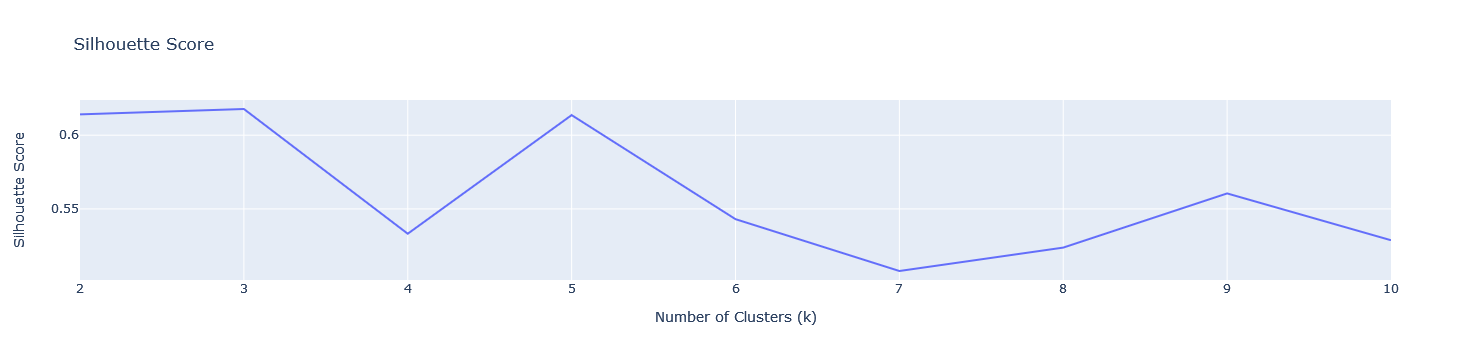

In [31]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_data_n_copy)
    silhouette_scores.append(silhouette_score(subset_data_n_copy, cluster_labels))

# Plot the Silhouette Score
silhouette_data = pd.DataFrame({"Number of Clusters (k)": range(2, 11), "Silhouette Score": silhouette_scores})
fig2 = px.line(silhouette_data, x="Number of Clusters (k)", y="Silhouette Score", title="Silhouette Score")
fig2.show()

In [34]:
#Perform K-Means 
# Apply clustering algorithm (K-means)
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(subset_data_n_copy)

# Add the cluster labels to the DataFrame
subset_data_n_copy["Cluster"] = cluster_labels

# Analyze the results
cluster_counts = subset_data_n_copy.groupby("Cluster").size()
print(cluster_counts)

Cluster
0    790
1    277
2     70
3     43
4     30
dtype: int64


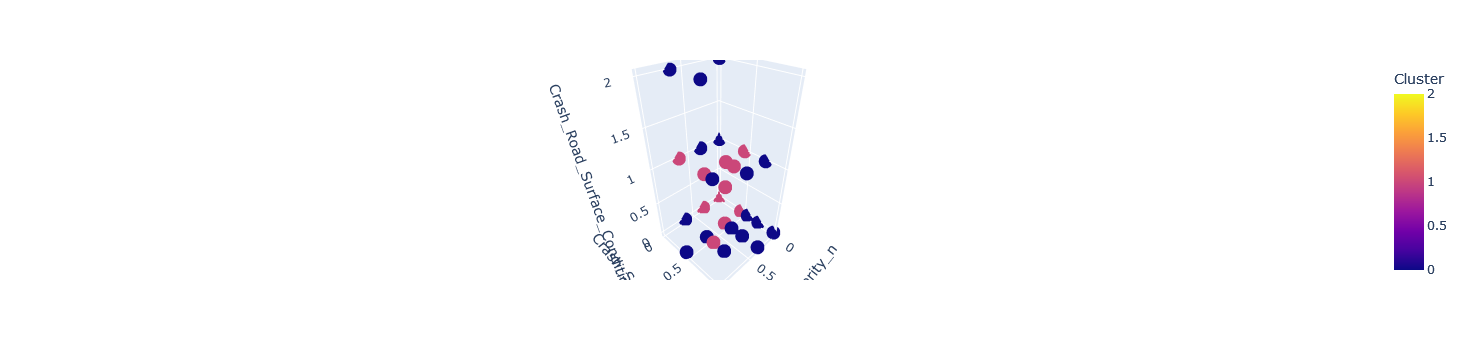

In [33]:
fig = px.scatter_3d(subset_data_n_copy, x='Crash_Severity_n', y='Crash_Speed_Limit_n', z='Crash_Road_Surface_Condition_n',
                    color='Cluster')
fig.show()